In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


<Axes: ylabel='Gender'>

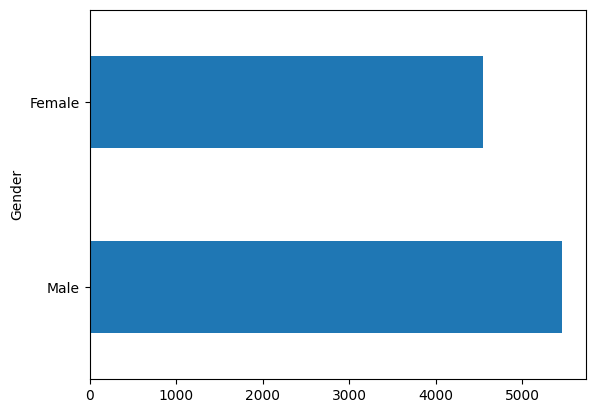

In [9]:
df['Gender'].value_counts().plot(kind='barh')

### Lable Encoding

In [15]:
le_enc = LabelEncoder()
df['Gender_lable'] = le_enc.fit_transform(df['Gender'])
df.head(10) 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_lable
0,619,France,Female,24,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,23,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,24,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,21,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,25,2,125510.82,1,1,1,79084.10,0,0
5,645,Spain,Male,26,8,113755.78,2,1,0,149756.71,1,1
6,822,France,Male,32,7,0.00,2,1,1,10062.80,0,1
7,376,Germany,Female,11,4,115046.74,4,1,0,119346.88,1,0
8,501,France,Male,26,4,142051.07,2,0,1,74940.50,0,1
9,684,France,Male,9,2,134603.88,1,1,1,71725.73,0,1


In [17]:
df['Gender_lable'].value_counts()

Gender_lable
1    5457
0    4543
Name: count, dtype: int64

### One Hot Encoding

In [21]:
one_hot = pd.get_dummies(df['Geography'], drop_first=True).astype(int)
one_hot.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [23]:
df_dummy = pd.get_dummies(df).astype(int)
df_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_lable,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,24,2,0,1,1,1,101348,1,0,1,0,0,1,0
1,608,23,1,83807,1,0,1,112542,0,0,0,0,1,1,0
2,502,24,8,159660,3,1,0,113931,1,0,1,0,0,1,0
3,699,21,1,0,2,0,0,93826,0,0,1,0,0,1,0
4,850,25,2,125510,1,1,1,79084,0,0,0,0,1,1,0


In [24]:
df_dummy_de = pd.get_dummies(df, drop_first=True).astype(int)
df_dummy_de.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_lable,Geography_Germany,Geography_Spain,Gender_Male
0,619,24,2,0,1,1,1,101348,1,0,0,0,0
1,608,23,1,83807,1,0,1,112542,0,0,0,1,0
2,502,24,8,159660,3,1,0,113931,1,0,0,0,0
3,699,21,1,0,2,0,0,93826,0,0,0,0,0
4,850,25,2,125510,1,1,1,79084,0,0,0,1,0


### Target Encoder

In [25]:
from category_encoders import TargetEncoder

In [26]:
encoder = TargetEncoder()

df1 = pd.read_csv('data/Churn_Modelling.csv')
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df1['Gender_encoded'] = encoder.fit_transform(df1['Gender'], df1['Exited'])


In [28]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.250715
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.250715
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.250715
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.250715
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.250715


In [29]:
df1['Gender_encoded'].value_counts()

Gender_encoded
0.164559    5457
0.250715    4543
Name: count, dtype: int64

#### Benefits of TE:

- Target Encoding is a simple and quick encoding method that doesn't add the dimentionality of the dataset. Therefore it may be used as a good first try technic


#### Limitation of TE:

- It can be prone to overfiting

### Hash Encoding

In [30]:
from category_encoders import HashingEncoder

In [31]:
X = df.Gender
Y = df.Exited

In [32]:
ce_hash = HashingEncoder(cols=['Gender'])
ce_hash.fit_transform(X,Y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,1,0,0
9996,0,0,0,0,0,1,0,0
9997,0,0,0,0,0,0,0,1
9998,0,0,0,0,0,1,0,0


In [34]:
X = df.Geography
Y = df.Exited

In [36]:
ce_hash = HashingEncoder(n_components=16 ,cols=['Geography'])
ce_hash.fit_transform(X,Y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
